In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
import warnings
warnings.filterwarnings("ignore")

## I. Iris Data

#### 1. Univariate Analysis

In [2]:
df_iris = acquire.get_iris_data()
df_iris_train, df_iris_test, df_iris_validate = prepare.prep_iris(df_iris)
dfit = df_iris_train
dfitest = df_iris_test
dfiv = df_iris_validate
dfit.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
79,versicolor,5.7,2.6,3.5,1.0,1,0
36,setosa,5.5,3.5,1.3,0.2,0,0


Checked to see the number of each species in each TVT dataframe - all are in direct proportion to the total number of records/rows in each. 

In [19]:
setosa_train = dfit[dfit.species == 'setosa']
versicolor_train = dfit[dfit.species == 'versicolor']
virginica_train = dfit[dfit.species == 'virginica']

In [20]:
virginica_train.shape[0], versicolor_train.shape[0], setosa_train.shape[0]

(28, 28, 28)

<AxesSubplot:>

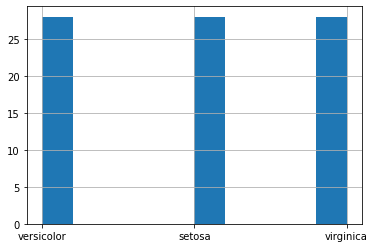

In [26]:
dfit.species.hist()

In [21]:
dfiv[dfiv.species == 'setosa'].shape[0], dfiv[dfiv.species == 'versicolor'].shape[0], dfiv[dfiv.species == 'virginica'].shape[0]

(10, 10, 10)

Get some general info and do some univariate plotting.

In [22]:
dfit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species             84 non-null     object 
 1   sepal_length        84 non-null     float64
 2   sepal_width         84 non-null     float64
 3   petal_length        84 non-null     float64
 4   petal_width         84 non-null     float64
 5   species_versicolor  84 non-null     uint8  
 6   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


In [23]:
numcols = [col for col in dfit.columns if dfit[col].dtype == 'float']
numcols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

sepal_length


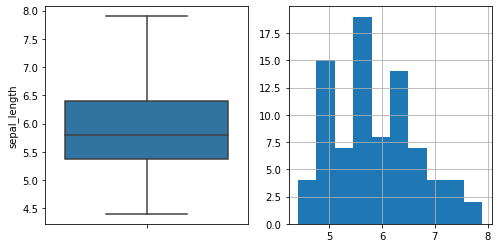

sepal_width


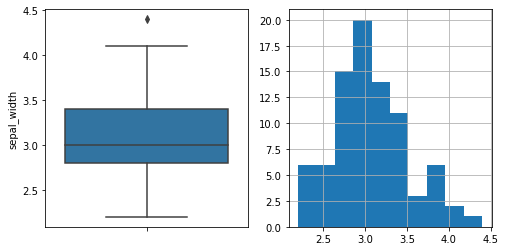

petal_length


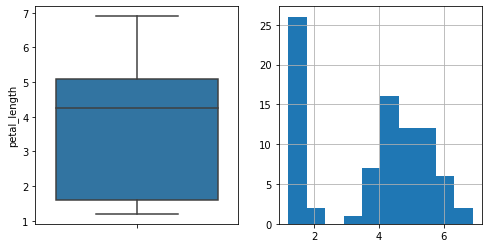

petal_width


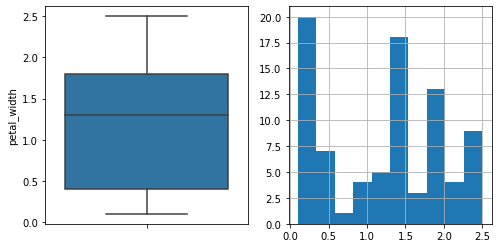

In [119]:
for x in numcols:
    plt.figure(figsize = (8,4))
    plt.subplot(121)
    sns.boxplot(y = dfit[x])
    plt.subplot(122)
    print(x)
    dfit[x].hist()
    plt.show()

Doesn't seem to be much info to glean from these univariate plots beyond there being a ot of counts with low petal length and width taht seem to be seperate from the rest.  Could these be a species?  Or maybe just juvenile plants.  

In [51]:
catcols = [col for col in dfit.columns if dfit[col].dtype == 'object']
catcols

['species']

#### 2. Bivariate Analysis

Questions to explore:
- Is there a relationship between each of the sepal/petal lengths and widths and species?

Creating a boxplot and descriptive statistics showing feature sizes of diferent species:

In [52]:
means = []
for i in range(4):
    means.append(dfit[numcols[i]].mean())
means    

[5.870238095238095, 3.0750000000000006, 3.7714285714285714, 1.2035714285714285]

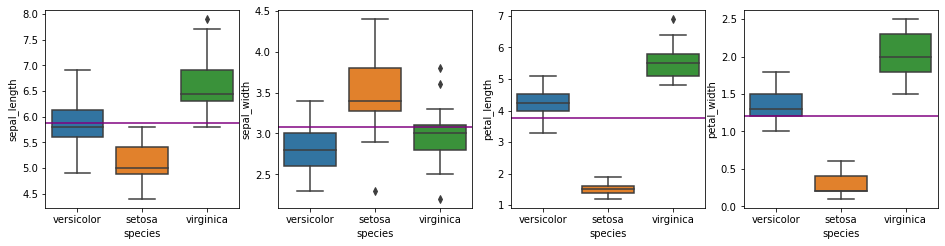

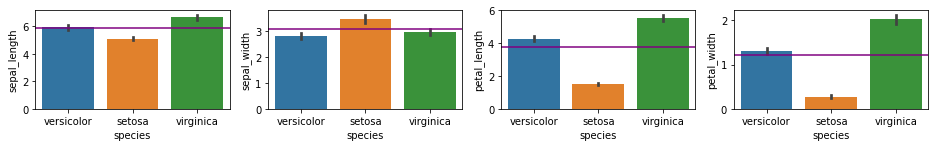

In [124]:
plt.figure(figsize = (16,8))
for x in range(4):
    plt.subplot(2,4,x+1)
    sns.boxplot(data = dfit, x = 'species', y = numcols[x])
    plt.axhline(means[x], c='purple')
plt.show()

plt.figure(figsize = (16,4))
for x in range(4):
    plt.subplot(2,4,x+1)
    sns.barplot(data = dfit, x = 'species', y = numcols[x])
    plt.axhline(means[x], c='purple')
plt.show()

Setosa plants are clearly differentiated on almost all aspects, in particular petals.  The other two are very similar and require a deeper analysis.  Therefore, we need to run some hypothesis tests to see if they are different.  As such:
- Comparing continuous with categorical, using Mann-Whiteney (as n<30 for each category fails t-test reqs)
- Set confidence level to 95%, so alpha = .05

In [54]:
H0_1 = 'do not reject null hypothesis there is no difference between the mean of the two samples'
Ha_1 = 'we reject the null hypothesis and accept alternative hypothesis that there is a difference between the mean of the two samples'
alpha = .05

In [84]:
#Already removed
#virginica_train.drop(columns=['species_versicolor','species_virginica'], inplace=True)
#versicolor_train.drop(columns=['species_versicolor','species_virginica'], inplace=True)

In [55]:
import scipy.stats as stats

In [56]:
u, p = stats.mannwhitneyu(virginica_train.petal_length, versicolor_train.petal_length)
u,p

(776.5, 2.9479835715150625e-10)

In [60]:
#For Mann-Whitney U test - you are technically not comparing means, but odds around means.  so,
#Alt: the probability of a randomly selected observation from viriginica is larger than a randomly selected observation from versicolor
for x in numcols:
    print('Comparing means of: ' + x + ' between Virginica and Vertosa')
    u,p = stats.mannwhitneyu(virginica_train[x], versicolor_train[x])
    if p < alpha:
        print(f'{p:.4f} is less than .05, therefore {Ha_1}')
    else:
        print(f'{p:.4f} is greater than .05, therefore {H0_1}')
    print('-----\n-----')

Comparing means of: sepal_length between Virginica and Vertosa
0.0000 is less than .05, therefore we reject the null hypothesis and accept alternative hypothesis that there is a difference between the mean of the two samples
-----
-----
Comparing means of: sepal_width between Virginica and Vertosa
0.0526 is greater than .05, therefore do not reject null hypothesis there is no difference between the mean of the two samples
-----
-----
Comparing means of: petal_length between Virginica and Vertosa
0.0000 is less than .05, therefore we reject the null hypothesis and accept alternative hypothesis that there is a difference between the mean of the two samples
-----
-----
Comparing means of: petal_width between Virginica and Vertosa
0.0000 is less than .05, therefore we reject the null hypothesis and accept alternative hypothesis that there is a difference between the mean of the two samples
-----
-----


Thus, other than sepal width we can clearly differntiate between the two species via their means.

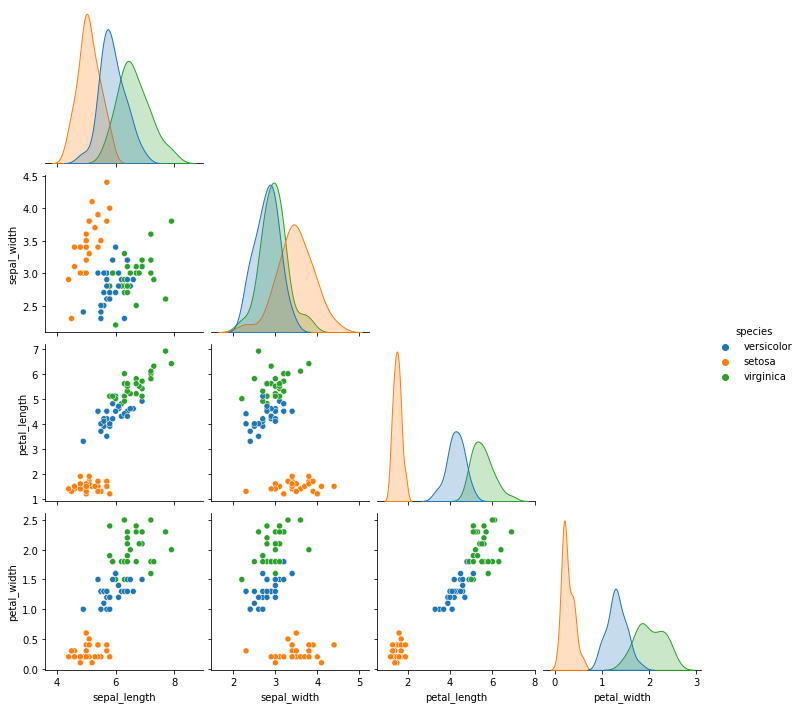

In [65]:
sns.pairplot(dfit.drop(columns=['species_versicolor','species_virginica']), corner=True, hue='species')

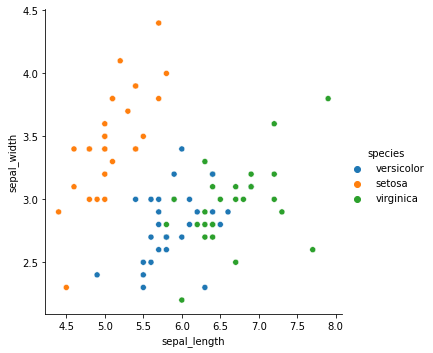

In [68]:
sns.relplot(data=dfit, x='sepal_length', y='sepal_width', hue='species')

In [70]:
##sns.swarmplot - how do I do this?

In [76]:
dfit['sepal_area'] = (dfit['sepal_length'] * dfit['sepal_width'])
dfit

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica,sepal_area
79,versicolor,5.7,2.6,3.5,1.0,1,0,14.82
36,setosa,5.5,3.5,1.3,0.2,0,0,19.25
133,virginica,6.3,2.8,5.1,1.5,0,1,17.64
95,versicolor,5.7,3.0,4.2,1.2,1,0,17.10
18,setosa,5.7,3.8,1.7,0.3,0,0,21.66
...,...,...,...,...,...,...,...,...
11,setosa,4.8,3.4,1.6,0.2,0,0,16.32
85,versicolor,6.0,3.4,4.5,1.6,1,0,20.40
55,versicolor,5.7,2.8,4.5,1.3,1,0,15.96
44,setosa,5.1,3.8,1.9,0.4,0,0,19.38


<AxesSubplot:xlabel='species', ylabel='sepal_area'>

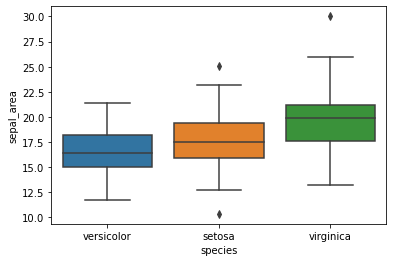

In [74]:
sns.boxplot(data=dfit, y='sepal_area', x='species')

In [79]:
virginica_train['sepal_area'] = (virginica_train['sepal_length'] * virginica_train['sepal_width'])
versicolor_train['sepal_area'] = (versicolor_train['sepal_length'] * versicolor_train['sepal_width'])
setosa_train['sepal_area'] = (setosa_train['sepal_length'] * setosa_train['sepal_width'])

In [80]:
u, p = stats.mannwhitneyu(virginica_train.sepal_area, versicolor_train.sepal_area)
u,p

(617.5, 0.0002261498645941265)

In [82]:
u, p = stats.mannwhitneyu(virginica_train.sepal_area, setosa_train.sepal_area)
u,p

(524.0, 0.031149014106469607)

In [83]:
u, p = stats.mannwhitneyu(setosa_train.sepal_area, versicolor_train.sepal_area)
u,p

(487.0, 0.12143751432042693)

Area is a poor determinant to differentiate Setosa from the others, however it is usable to differentiate between Virginia and Vertosa.

In [ ]:
#Don't forget to use heatmaps - powerful for exploration!!!

### II. Titanic Data

In [85]:
df_titanic = acquire.get_titanic_data()
df_titanic_train, df_titanic_test, df_titanic_validate = prepare.prep_titanic(df_titanic)
dftt = df_titanic_train
dfttest = df_titanic_test
dftv = df_titanic_validate
dftt.head(2)

,survived,pclass,sex,age,Siblings/Spouses,Parents/Children,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.0,0,0,40.125,Cherbourg,1,1,0,0
165,1,3,male,9.0,0,2,20.525,Southampton,0,1,0,1


In [88]:
dfttmod = dftt.drop(columns=['embark_town_Queenstown', 'embark_town_Southampton'])
dfttmod.drop(columns=['age'], inplace=True)

In [89]:
dfttmod

,survived,pclass,sex,Siblings/Spouses,Parents/Children,fare,embark_town,alone,sex_male
583,0,1,male,0,0,40.1250,Cherbourg,1,1
165,1,3,male,0,2,20.5250,Southampton,0,1
50,0,3,male,4,1,39.6875,Southampton,0,1
259,1,2,female,0,1,26.0000,Southampton,0,0
306,1,1,female,0,0,110.8833,Cherbourg,1,0
...,...,...,...,...,...,...,...,...,...
313,0,3,male,0,0,7.8958,Southampton,1,1
636,0,3,male,0,0,7.9250,Southampton,1,1
222,0,3,male,0,0,8.0500,Southampton,1,1
485,0,3,female,3,1,25.4667,Southampton,0,0


In [90]:
dfttmod.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   survived          498 non-null    int64  
 1   pclass            498 non-null    int64  
 2   sex               498 non-null    object 
 3   Siblings/Spouses  498 non-null    int64  
 4   Parents/Children  498 non-null    int64  
 5   fare              498 non-null    float64
 6   embark_town       497 non-null    object 
 7   alone             498 non-null    int64  
 8   sex_male          498 non-null    uint8  
dtypes: float64(1), int64(5), object(2), uint8(1)
memory usage: 35.5+ KB


In [112]:
to_drop = dfttmod[dfttmod.embark_town.isna() == True].index[0]

In [115]:
dfttmod.drop(to_drop, inplace=True)

In [117]:
dfttmod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 583 to 744
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   survived          497 non-null    int64  
 1   pclass            497 non-null    int64  
 2   sex               497 non-null    object 
 3   Siblings/Spouses  497 non-null    int64  
 4   Parents/Children  497 non-null    int64  
 5   fare              497 non-null    float64
 6   embark_town       497 non-null    object 
 7   alone             497 non-null    int64  
 8   sex_male          497 non-null    uint8  
dtypes: float64(1), int64(5), object(2), uint8(1)
memory usage: 35.4+ KB


<AxesSubplot:xlabel='survived', ylabel='fare'>

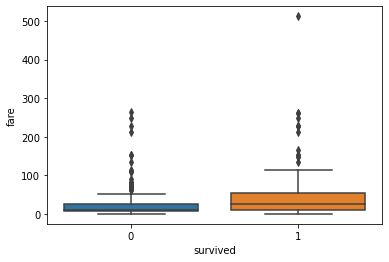

In [118]:
sns.boxplot(data=dfttmod, x='survived', y='fare')